### XGBOOST model

In [31]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('./dataset/final_data.csv')
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
31676,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
31677,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
31678,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [7]:
display("NULL Values", df.isnull().sum())

'NULL Values'

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [8]:
severity_columns = df.filter(like='Severity_').columns

In [9]:
df['Severity_None'].replace({1:5,0:0},inplace =True)
df['Severity_Mild'].replace({1:10, 0:3},inplace =True)
df['Severity_Moderate'].replace({1:15,0:5},inplace =True)
df['Severity_Severe'].replace({1:25,0:7},inplace =True)

In [10]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

In [11]:
t1 = df['Severity_None']*df['Symptoms_Score']
t2 = (df['Severity_Mild']**2)*df['Symptoms_Score']
t3 = (df['Severity_Moderate']**3)*df['Symptoms_Score']
t4 = (df['Severity_Severe']**4)*df['Symptoms_Score']
total = (t1 + t2 + t3 + t4)/10000 + 100*df['Contact_Yes'] + 50*df['Contact_Dont-Know']
df['Condition']= total
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score,Condition
0,1,1,1,1,1,0,1,1,1,1,...,0,10,5,0,7,0,0,1,9,102.3634
1,1,1,1,1,1,0,1,1,1,1,...,0,10,5,0,7,0,1,0,9,2.3634
2,1,1,1,1,1,0,1,1,1,1,...,0,10,5,0,7,1,0,0,9,52.3634
3,1,1,1,1,1,0,1,1,1,1,...,0,3,15,0,7,0,0,1,9,105.2065
4,1,1,1,1,1,0,1,1,1,1,...,0,3,15,0,7,0,1,0,9,5.2065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,...,1,3,5,0,25,0,1,0,0,0.0000
31676,0,0,0,0,0,1,0,0,0,0,...,1,3,5,0,25,1,0,0,0,50.0000
31677,0,0,0,0,0,1,0,0,0,0,...,1,3,5,5,7,0,0,1,0,100.0000
31678,0,0,0,0,0,1,0,0,0,0,...,1,3,5,5,7,0,1,0,0,0.0000


<AxesSubplot:>

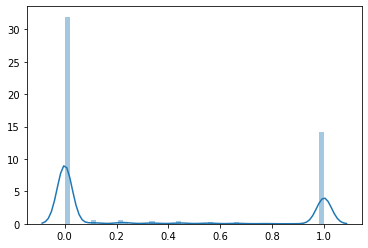

In [32]:
sns.distplot(df)

In [12]:
display("Description",df.describe())

'Description'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score,Condition
count,31680.00000,31680.000000,31680.000000,31680.000000,31680.00000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,...,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000,31680.000000
mean,0.31250,0.500000,0.562500,0.500000,0.31250,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,4.750000,7.500000,1.250000,11.500000,0.333333,0.333333,0.333333,4.005682,90.228061
std,0.46352,0.500008,0.496086,0.500008,0.46352,0.242065,0.481053,0.497937,0.497937,0.481053,...,0.471412,3.031137,4.330195,2.165098,7.794352,0.471412,0.471412,0.471412,1.736983,85.601335
min,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,5.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,5.000000,0.000000,7.000000,0.000000,0.000000,0.000000,3.000000,5.061875
50%,0.00000,0.500000,1.000000,0.500000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,3.000000,5.000000,0.000000,7.000000,0.000000,0.000000,0.000000,4.000000,54.049500
75%,1.00000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,4.750000,7.500000,1.250000,11.500000,1.000000,1.000000,1.000000,5.000000,102.892500
max,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,10.000000,15.000000,5.000000,25.000000,1.000000,1.000000,1.000000,9.000000,451.683100


In [16]:
scaler = MinMaxScaler()
def Normalization(Params):
    for i in Params:
        df[i]= scaler.fit_transform(pd.DataFrame(df[i])) 
Normalization(['Condition','Symptoms_Score',severity_columns])

df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score,Condition,Result
0,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0,0,1,1.0,0.226627,1
1,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0,1,0,1.0,0.005232,1
2,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,1,0,0,1.0,0.115930,1
3,1,1,1,1,1,0,1,1,1,1,...,0.0,1.0,0.0,0.0,0,0,1,1.0,0.232921,1
4,1,1,1,1,1,0,1,1,1,1,...,0.0,1.0,0.0,0.0,0,1,0,1.0,0.011527,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0,1,0,0.0,0.000000,0
31676,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,1,0,0,0.0,0.110697,1
31677,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,1,0.0,0.221394,1
31678,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0,1,0,0.0,0.000000,0


In [17]:
df['Result'] = df['Condition'].apply(lambda x: 1 if x >= 0.33 else 0)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score,Condition,Result
0,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0,0,1,1.0,0.226627,0
1,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0,1,0,1.0,0.005232,0
2,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,1,0,0,1.0,0.115930,0
3,1,1,1,1,1,0,1,1,1,1,...,0.0,1.0,0.0,0.0,0,0,1,1.0,0.232921,0
4,1,1,1,1,1,0,1,1,1,1,...,0.0,1.0,0.0,0.0,0,1,0,1.0,0.011527,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0,1,0,0.0,0.000000,0
31676,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,1,0,0,0.0,0.110697,0
31677,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,1,0.0,0.221394,0
31678,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0,1,0,0.0,0.000000,0


In [18]:
df.drop(['None_Sympton','None_Experiencing'], axis=1)
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score,Condition,Result
0,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0,0,1,1.0,0.226627,0
1,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0,1,0,1.0,0.005232,0
2,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,1,0,0,1.0,0.115930,0
3,1,1,1,1,1,0,1,1,1,1,...,0.0,1.0,0.0,0.0,0,0,1,1.0,0.232921,0
4,1,1,1,1,1,0,1,1,1,1,...,0.0,1.0,0.0,0.0,0,1,0,1.0,0.011527,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31675,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0,1,0,0.0,0.000000,0
31676,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,1,0,0,0.0,0.110697,0
31677,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,1,0.0,0.221394,0
31678,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1.0,0.0,0,1,0,0.0,0.000000,0


In [20]:
x = df.drop(['Result'], axis=1)
y = df['Result']
y

0        0
1        0
2        0
3        0
4        0
        ..
31675    0
31676    0
31677    0
31678    0
31679    0
Name: Result, Length: 31680, dtype: int64

In [21]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=test_size, random_state=seed)


In [22]:
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [24]:
pickle.dump(model, open('model.pkl','wb'))

In [25]:
model = pickle.load(open('model.pkl','rb'))

In [26]:
y_test

24815    0
21941    0
28611    0
12510    1
16160    1
        ..
19312    0
26312    1
19150    0
3362     0
13277    0
Name: Result, Length: 10455, dtype: int64

In [27]:
# make predictions for test data
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[8474,    0],
       [   0, 1981]], dtype=int64)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
